In [88]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [89]:
data = pd.read_csv('data/spinitial.csv')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    2377 non-null   object 
 1   previous_open                           2377 non-null   float64
 2   previous_high                           2377 non-null   float64
 3   previous_low                            2377 non-null   float64
 4   previous_close                          2377 non-null   float64
 5   2_weeks_ago_close                       2406 non-null   float64
 6   previous_volume                         2377 non-null   float64
 7   previous_return                         2406 non-null   object 
 8   following_week_close                    2377 non-null   float64
 9   following_week_return                   2377 non-null   object 
 10  jobless_claims                          2378 non-null   floa

In [91]:
data = data.drop('week_of_month',axis=1)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    2377 non-null   object 
 1   previous_open                           2377 non-null   float64
 2   previous_high                           2377 non-null   float64
 3   previous_low                            2377 non-null   float64
 4   previous_close                          2377 non-null   float64
 5   2_weeks_ago_close                       2406 non-null   float64
 6   previous_volume                         2377 non-null   float64
 7   previous_return                         2406 non-null   object 
 8   following_week_close                    2377 non-null   float64
 9   following_week_return                   2377 non-null   object 
 10  jobless_claims                          2378 non-null   floa

In [93]:
data = data.dropna()


In [94]:
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month

In [95]:
data['previous_return']=data['previous_return'].astype(float)
data['following_week_return']=data['following_week_return'].astype(float)
data['4_week_rolling_std dev']=data['4_week_rolling_std dev'].astype(float)
data['13_week_rolling_std dev']=data['13_week_rolling_std dev'].astype(float)
data['26_week_rolling_std dev']=data['26_week_rolling_std dev'].astype(float)
data['40_week_rolling_std_dev']=data['40_week_rolling_std_dev'].astype(float)
data['52_week_rolling_std_dev']=data['52_week_rolling_std_dev'].astype(float)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2277 entries, 100 to 2376
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    2277 non-null   datetime64[ns]
 1   previous_open                           2277 non-null   float64       
 2   previous_high                           2277 non-null   float64       
 3   previous_low                            2277 non-null   float64       
 4   previous_close                          2277 non-null   float64       
 5   2_weeks_ago_close                       2277 non-null   float64       
 6   previous_volume                         2277 non-null   float64       
 7   previous_return                         2277 non-null   float64       
 8   following_week_close                    2277 non-null   float64       
 9   following_week_return                   2277 non-null  

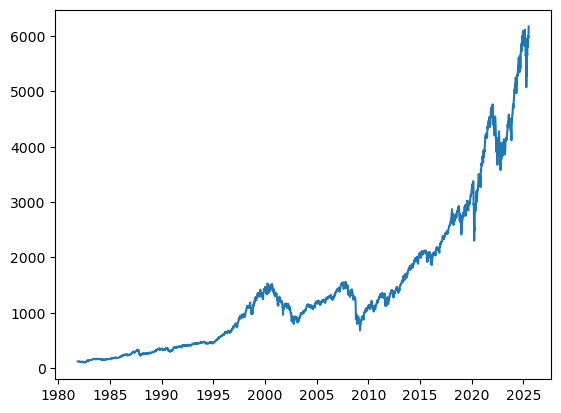

In [96]:
plt.plot(data['Date'],data['previous_close'])

In [110]:
data.dropna()
X=data.drop(['following_week_close','following_week_return','month','Date'],axis=1)
y=data['following_week_close']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [112]:
numerical=['previous_open','previous_high','previous_low','previous_close','2_weeks_ago_close','previous_volume','previous_return','52_week_ma','40_week_ma','26_week_MA','13_week_ma','8_week_MA','4_week_MA','100_week_ma','previos_week_30_year_constant_maturity','previos_week_7_year_constant_maturity','previos_week_2_year_constant_maturity','jobless_claims','100_week_ma','4_week_rolling_std dev','13_week_rolling_std dev','26_week_rolling_std dev','40_week_rolling_std_dev','52_week_rolling_std_dev']

In [113]:
polytransformer = Pipeline([
                                    ('poly',PolynomialFeatures(degree = 3,include_bias=False)),
                                    ('scale',StandardScaler())
                                ])
transformer = [('polynomialtransformations',polytransformer,numerical)]
transform = ColumnTransformer(transformers = transformer,remainder='passthrough')

In [114]:
initialpipe = Pipeline([
    ('transform',transform),
    ('reg',LinearRegression())
])

In [115]:
baselinemodel = initialpipe.fit(X_train,y_train)
preds = baselinemodel.predict(X_test)
baselineerror = mean_squared_error(y_test,preds)

In [116]:
baselineerror

1233344.895910115